# Project - 2


`Libraries`


In [1]:
import matplotlib.pyplot as plt
import numpy as np

`Grid Specifications`


In [2]:
Lx, Ly = 50.0, 1.0
Re = 1e4
U_inf = 50.0
nx, ny = 1000, 250
nu = U_inf/(Re * Lx)
x = np.linspace(0, Lx, nx)
y = np.linspace(0, Ly, ny)
u = np.zeros((nx, ny))
v = np.zeros((nx, ny))
psi = np.zeros((nx, ny))
C = 0.3 # multiplication factor to get growth factor below

`Plotting Functions`


In [15]:
def contourPlot(x,y,u):
    X, Y = np.meshgrid(x, y)
    plt.figure(figsize=(8, 6))
    plt.contourf(X, Y, u.T, levels=50, cmap='jet')
    plt.colorbar(label='u')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.ylim(0, 0.5)
    plt.title('Contour Plot of u')
    plt.show()

In [16]:
def streamlines(x,y,u,v):
    X, Y = np.meshgrid(x, y)
    plt.figure(figsize=(8, 6))
    plt.streamplot(X,Y, u.T, v.T, color='k', linewidth=1)
    plt.title('Streamlines Over Flat Plate')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

1. Euler Explicit scheme


In [17]:
dy = Ly / (ny - 1)
dx = (dy**2)/(2 *nu)

## Boundry conditions
u[:, 0] = U_inf
u[:, -1] = 0
v[:, 0] = 0
v[0, :] = 0

`Explicit parameters`


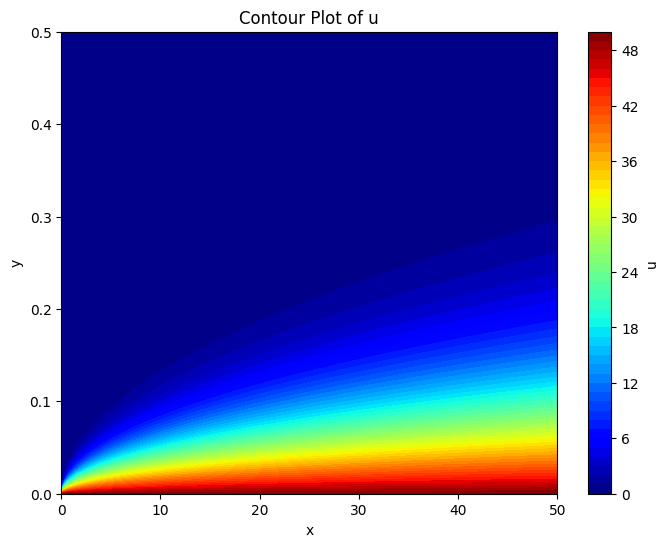

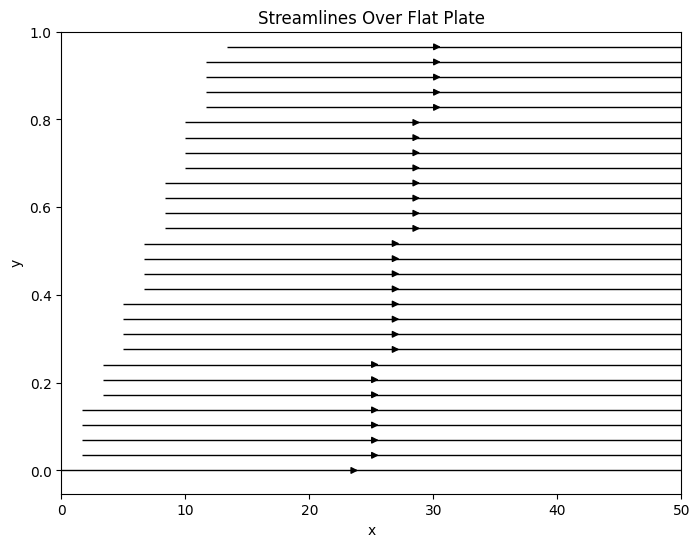

In [18]:
for i in range(1, nx):
    un = u[i-1, :].copy()

    for j in range(1, ny-1):
        v[i, j] = v[i, j-1] - (dy / (2 * dx)) * (u[i-1, j] - un[j])

        u[i, j] = un[j] + dx * (
            -v[i, j] * (un[j+1] - un[j-1]) / (2 * dy)
            + nu * (un[j+1] - 2 * un[j] + un[j-1]) / dy**2
        )

contourPlot(x,y,u)
streamlines(x,y,u,v)


2.  Euler Implicit scheme


In [1]:
def TDMA(a, b, c, d):
    n = len(d)
    cp = np.zeros(n)
    dp = np.zeros(n)

    cp[0] = c[0] / b[0]
    dp[0] = d[0] / b[0]

    for i in range(1, n):
        denom = b[i] - a[i] * cp[i - 1]
        cp[i] = c[i] / denom
        dp[i] = (d[i] - a[i] * dp[i - 1]) / denom

    x = np.zeros(n)
    x[-1] = dp[-1]
    for i in range(n - 2, -1, -1):
        x[i] = dp[i] - cp[i] * x[i + 1]

    return x

3. Crank-Nicolson scheme
